In [140]:
from dfply import *
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

from bokeh.io import output_notebook, show
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # offline plotly

from numpy import arange,array,ones
from scipy import stats

init_notebook_mode(connected=True)

## Import Data

Import data into python environment and analize the feilds and demensions

In [141]:
url='https://raw.githubusercontent.com/charleyferrari/CUNY_DATA_608/master/module4/Data/riverkeeper_data_2013.csv'
riverKeeper_df = pd.read_csv(url)

print("\033[1m riverKeeper_df Dimension: \033[0m ",riverKeeper_df.shape,'\n')
print("\033[1m riverKeeper_df Fields: \n \033[0m ",riverKeeper_df.dtypes,'\n')

print("\033[1m riverKeeper_df EnteroCount field has non-numeric characters: \n \033[0m ",riverKeeper_df.iloc[17:21, 2],'\n')

riverKeeper_df.head()



 riverKeeper_df Dimension:   (3397, 5) 

 riverKeeper_df Fields: 
   Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object 

 riverKeeper_df EnteroCount field has non-numeric characters: 
   17       91
18    >2420
19       15
20       25
Name: EnteroCount, dtype: object 



,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35


## Clean Data

1- Eliminate the non-numeric characters of EnteroCount elements and covert the feild type to numeric.
2- Convert date into Time Format Strings


In [142]:

riverKeeper_df['EnteroCount'] = riverKeeper_df['EnteroCount'].str.replace('[^\w\s]','')
riverKeeper_df['EnteroCount']=riverKeeper_df['EnteroCount'].apply(pd.to_numeric, errors='coerce')

riverKeeper_df['Date'] = pd.Series([pd.to_datetime(d) for d in riverKeeper_df['Date']])

print("\033[1m riverKeeper_df Fields: \n \033[0m ",riverKeeper_df.dtypes,'\n')

print("\033[1m Date Duration \n \033[0m ")
print("min: ",riverKeeper_df['Date'].min())
print("max: ",riverKeeper_df['Date'].max())

print("\n \033[1m Minimum and Maximum Samples Count Per Entry \n \033[0m ")
print("min: ",riverKeeper_df['SampleCount'].min())
print("max: ",riverKeeper_df['SampleCount'].max())

print("\n \033[1m Minimum and Maximum Four Days Rain Measure Per Entry \n \033[0m ")
print("min: ",riverKeeper_df['FourDayRainTotal'].min())
print("max: ",riverKeeper_df['FourDayRainTotal'].max())


 riverKeeper_df Fields: 
   Site                        object
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object 

 Date Duration 
  
min:  2006-09-19 00:00:00
max:  2013-10-21 00:00:00

  Minimum and Maximum Samples Count Per Entry 
  
min:  27
max:  187

  Minimum and Maximum Four Days Rain Measure Per Entry 
  
min:  0.0
max:  8.5


## Visual Representation 

* Find the sites mean
* Find best 5 sites 
* graph results

In [143]:
sites = riverKeeper_df.groupby(riverKeeper_df['Site'])["EnteroCount"].mean().reset_index()
sites = sites.sort_values('EnteroCount').reset_index(drop=True)

print("\033[1m riverKeeper_df Dimension: \033[0m ",sites.shape,'\n')
print(sites.head())


 riverKeeper_df Dimension:   (75, 2) 

                                 Site  EnteroCount
0  Poughkeepsie Drinking Water Intake     8.342105
1                  Croton Point Beach    15.458333
2             Stony Point mid-channel    17.340909
3                  Little Stony Point    17.526316
4            Poughkeepsie Launch Ramp    17.675676


In [144]:
sites = sites.sort_values('EnteroCount',ascending=False)
trace = go.Bar(
    x=sites.EnteroCount,
    y=sites.Site,
    orientation = 'h'
)

layout = go.Layout(
    width = 800,
    height = 500,
    title = "Best and Worst Sites",
    xaxis = dict(
        title = 'EnteroCount',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        )
    ),
    yaxis = dict(
        title = 'Sites',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=6,
            color='black'
        )    
    )
)

fig = go.Figure(data = [trace], layout = layout)

plotly.offline.iplot(fig)

In [145]:
def PlotResult(df,Title,Color):
    if Color == "green":
        barColor='rgb(50,255,50)'
    else:
        barColor='rgb(0,0,255)'
        
    trace = go.Bar(
        x=df.EnteroCount,
        y=df.Site,
        orientation = 'h',
        marker=dict(
            color=barColor,
            line=dict(
                color='rgb(8,48,107)',
                width=1.5,
            )
        )
    )

    layout = go.Layout(
        width = 800,
        height = 500,
        title = Title,
        xaxis = dict(
            title = 'EnteroCount',
            titlefont=dict(
                family='Arial, sans-serif',
                size=18,
                color='lightgrey'
            )
        ),
        yaxis = dict(
            title = 'Sites',
            titlefont=dict(
                family='Arial, sans-serif',
                size=18,
                color='lightgrey'
            ),
            showticklabels=True,
            tickangle=45,
            tickfont=dict(
                family='Old Standard TT, serif',
                size=9,
                color='black'
            )    
        )
    )

    fig = go.Figure(data = [trace], layout = layout)

    plotly.offline.iplot(fig)

In [146]:
def getBestSites_ByDate( datestr ):
    SitesByDate = riverKeeper_df[riverKeeper_df['Date'] == datestr]
    x=SitesByDate.shape[0]
    
    print(type(x))
    if x < 1:
        print("\033[1m No Record For This Date: \033[0m \n")
    else:
        SitesByDate = SitesByDate.sort_values('EnteroCount').reset_index(drop=True)  
        SitesByDate = SitesByDate.head(5)
        SitesByDate = SitesByDate.sort_values('EnteroCount',ascending=False).reset_index(drop=True)
        SitesByDate = SitesByDate[['Site','EnteroCount']]
        PlotResult(SitesByDate,"Sites With Lowest EnteroCount For " + datestr,"blue")
        SafeSites = SitesByDate[SitesByDate['EnteroCount'] < 31]
    
        if SafeSites.shape[0] > 0:
            PlotResult(SafeSites,"Safe Sites For " + datestr,"green")
        else:
            print("\033[1m None of The Sites is Safe For \033[0m" + datestr + '\n')
            

In [147]:
#test for desire date
desireDate='10/21/2011'
getBestSites_ByDate(desireDate)

<class 'int'>


## Question 2

Separate the wet from dry days and plot the data


In [148]:
SitesDry = riverKeeper_df[riverKeeper_df['FourDayRainTotal'] == 0]
SitesWet = riverKeeper_df[riverKeeper_df['FourDayRainTotal'] > 0]
print(SitesDry.shape)
print(SitesWet.shape)

print("\n \033[1m Minimum and Maximum Four Days Rain Measure Per Entry \n \033[0m ")
print("min: ",SitesDry['EnteroCount'].min())
print("max: ",SitesDry['EnteroCount'].max())

print("\n \033[1m Minimum and Maximum Four Days Rain Measure Per Entry \n \033[0m ")
print("min: ",SitesWet['EnteroCount'].min())
print("max: ",SitesWet['EnteroCount'].max())

(1266, 5)
(2131, 5)

  Minimum and Maximum Four Days Rain Measure Per Entry 
  
min:  1
max:  10112

  Minimum and Maximum Four Days Rain Measure Per Entry 
  
min:  0
max:  24196


In [149]:
    
    dry = go.Bar(
        x=SitesDry.Site,
        y=SitesDry.EnteroCount,
        name='dry',
        marker=dict(color='rgb(200,150,150)')
    )
    
    wet= go.Bar(
        x=SitesWet.Site,
        y=SitesWet.EnteroCount,
        name='wet',
        marker=dict(color='rgb(100,100,150)')
    )

    layout = go.Layout(
        width = 900,
        height = 500,
        title = "Dry Wet Plot",
        xaxis = dict(
            title = 'EnteroCount',
            titlefont=dict(
                family='Arial, sans-serif',
                size=18,
                color='lightgrey'
            ),
            showticklabels=True,
            tickangle=45,
            tickfont=dict(
                family='Old Standard TT, serif',
                size=9,
                color='black'
            )    
        ),
        yaxis = dict(
            title = 'Sites',
            titlefont=dict(
                family='Arial, sans-serif',
                size=18,
                color='lightgrey'
            ),
            showticklabels=True,
            tickangle=45,
            tickfont=dict(
                family='Old Standard TT, serif',
                size=12,
                color='black'
            )    
        )
    )

    fig = go.Figure(data = [dry,wet], layout = layout)

    plotly.offline.iplot(fig)

The above chart shows that some increasing number of entrocount for rainy days.
Lets check the correlation of all the data.

In [150]:
xi = riverKeeper_df.FourDayRainTotal
y = riverKeeper_df.EnteroCount

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x=xi,
                  y=y,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=xi,
                  y=line,
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=3.5,
                  y=23.5,
                  text='$R^2 = 0.9551,\\Y = 0.716X + 19.18$',
                  showarrow=False,
                  font=go.Font(size=16)
                  )
layout = go.Layout(
                title='Linear Fit in Python',
                plot_bgcolor='rgb(229, 229, 229)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  annotations=[annotation]
                )

fig = go.Figure(data = [trace1,trace2], layout = layout)

plotly.offline.iplot(fig)

Lets take look into all sites to find if there is correlation.

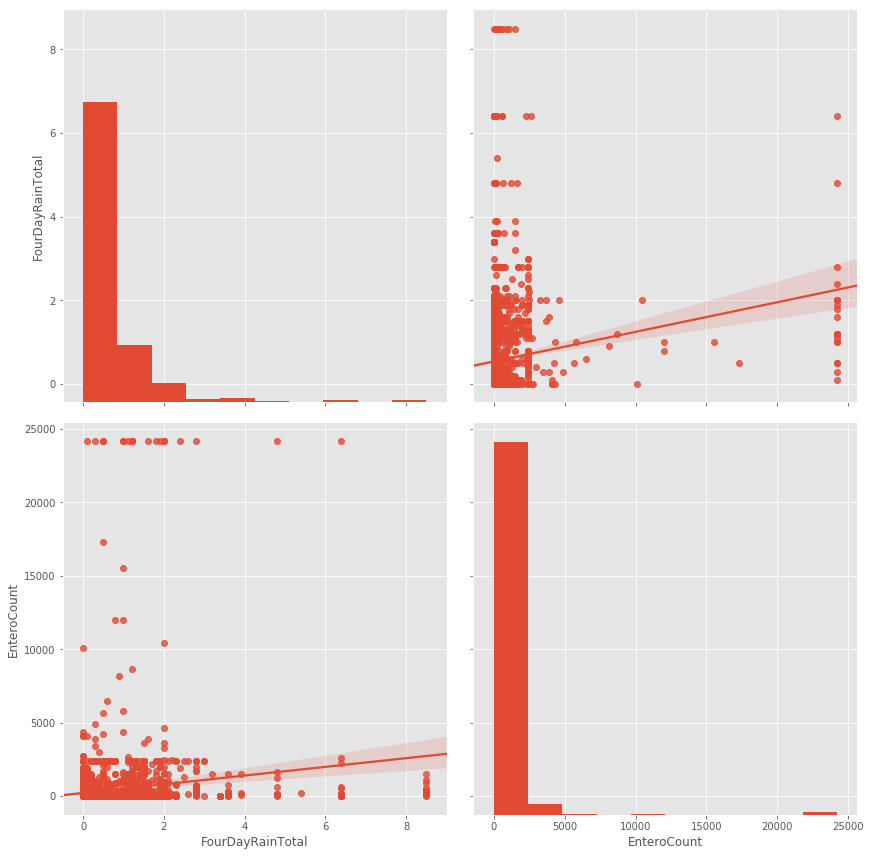

In [151]:
tmpsites=riverKeeper_df[['Site','FourDayRainTotal','EnteroCount']]
sns.pairplot(tmpsites, kind="reg",size=6)
plt.show()


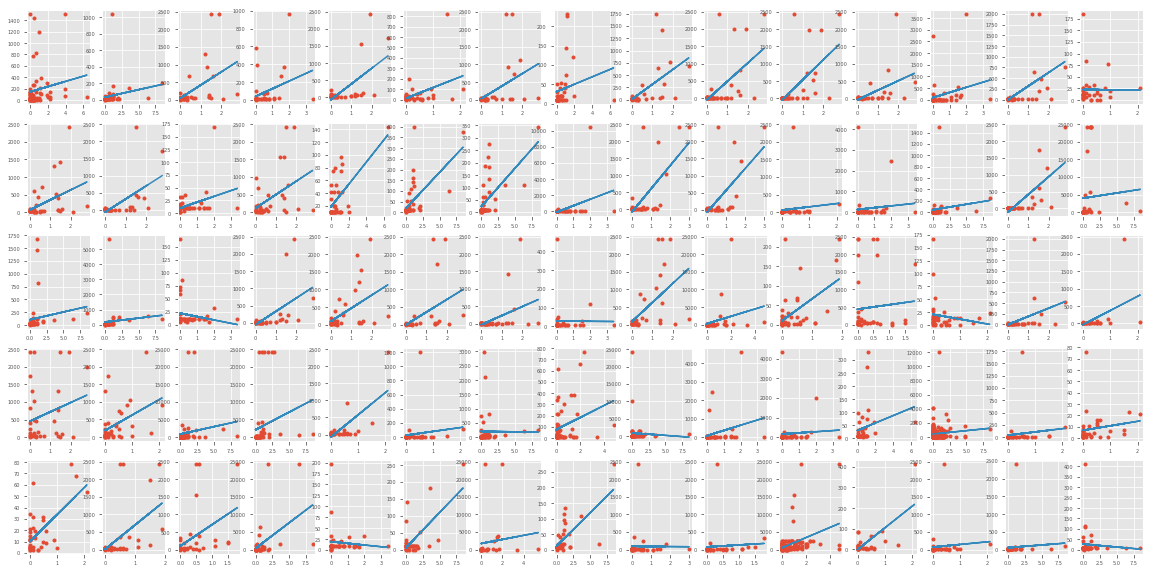

In [152]:
sites = tmpsites.groupby(riverKeeper_df['Site'])
corrolation=[]
dd=[sites.get_group(x) for x in sites.groups]
plt.figure(figsize=(20,10))
for i in range(len(dd)):
    tmp= pd.DataFrame(dd[i]).reset_index(drop=True) 
    matplotlib.rcParams.update({'font.size': 5})
    plt.subplot(5, 15, i+1)
    x=tmp['FourDayRainTotal']
    y=tmp['EnteroCount']
    m, b = np.polyfit(x,y,1)
    plt.plot(x, y, '.')
    plt.plot(x, m*x + b, '-')
    corrolation.append((tmp['FourDayRainTotal'].corr(tmp['EnteroCount']))*100)
     

In [153]:
sitesdf = riverKeeper_df.groupby(riverKeeper_df['Site'])["EnteroCount"].mean().reset_index()
sitesdf = sitesdf.sort_values('Site').reset_index(drop=True)
tmpy = riverKeeper_df.groupby(riverKeeper_df['Site'])['FourDayRainTotal'].mean().reset_index()
tmpy = tmpy.sort_values('Site').reset_index(drop=True)
sitesdf['FourDayRainTotal'] = tmpy['FourDayRainTotal']
sitesdf['corr'] = corrolation


Plot the correlations of all sites

In [154]:

s =sitesdf['corr']
trace0 = go.Scatter(
    x=sitesdf['FourDayRainTotal'],
    y=sitesdf['EnteroCount'],
    text =round(s/100,3),
    hoverinfo = 'text',
    mode='markers',
    marker=dict(
        size=sitesdf['corr'],
    )
)

data = [trace0]


plotly.offline.iplot(data, filename='bubblechart-color')

In [155]:
print('Highest correlation: ',sitesdf['corr'].max())
print('Lowest correlation: ',sitesdf['corr'].min())
weakCorr = sitesdf[(sitesdf['corr']>=0) & (sitesdf['corr']<30)]
MediumCorr = sitesdf[(sitesdf['corr']>=30) & (sitesdf['corr']<60)]
StrongCorr = sitesdf[sitesdf['corr']>=60]
negativeCorr= sitesdf[sitesdf['corr']<0]


Highest correlation:  72.9229222516908
Lowest correlation:  -16.2647282518362


In [156]:
weakCorr=weakCorr.sort_values('corr',ascending=False).reset_index(drop=True)
print("The following shows a little or no relationship between rain and enteroCount \n\n")
display(weakCorr)

The following shows a little or no relationship between rain and enteroCount 




,Site,EnteroCount,FourDayRainTotal,corr
0,Nyack Launch Ramp,105.032787,0.506557,28.540755
1,Kingsland Pt. Park- Pocantico River,907.857143,0.602381,26.706380
2,Ossining Beach,206.957447,0.457447,26.004660
3,Mohawk River at Waterford,621.057143,0.631429,23.963273
4,Cedar Pond Brook,199.702128,0.482979,23.673319
5,Pier 96 Kayak Launch,40.205128,0.674359,22.427859
6,Newtown Creek- Metropolitan Ave. Bridge,2953.684211,0.852632,20.166309
7,"Castle Point, NJ",37.076923,0.664103,19.176326
8,79th St. mid-channel,47.204082,0.861224,18.810021
9,Poughkeepsie Drinking Water Intake,8.342105,0.350000,16.581934


In [157]:
MediumCorr=MediumCorr.sort_values('corr',ascending=False).reset_index(drop=True)
print("The following shows a medium relationship between rain and enteroCount \n")
display(MediumCorr)

The following shows a medium relationship between rain and enteroCount 



,Site,EnteroCount,FourDayRainTotal,corr
0,Coxsackie Waterfront Park,170.457143,0.605714,57.161971
1,Catskill Creek- East End,261.238095,0.578571,56.485166
2,Castleton,186.000000,0.588571,55.208985
3,Island Creek/Normans Kill,431.828571,0.642857,54.343038
4,Hudson Landing Ramp,174.783784,0.583784,54.146751
5,Rondout- Eddyville Anchorage,265.200000,0.366667,53.406281
6,Kingston Point Beach,30.558140,0.341860,50.401141
7,Coeymans Landing,186.555556,0.594444,49.008685
8,Hudson River above Troy Lock,331.540541,0.629730,47.003849
9,Catskill Launch Ramp,132.378378,0.605405,46.984761


In [158]:
StrongCorr=StrongCorr.sort_values('corr',ascending=False).reset_index(drop=True)
print("The following shows a strong relationship between rain and enteroCount \n")
display(StrongCorr)

The following shows a strong relationship between rain and enteroCount 



,Site,EnteroCount,FourDayRainTotal,corr
0,Gay's Point mid-channel,193.888889,0.580556,72.922922
1,Norrie Point Yacht Basin,128.805556,0.311111,71.881011
2,The Battery mid-channel,30.163265,0.859184,69.942560
3,Esopus Creek Entrance,263.558140,0.506977,69.336159
4,Wappingers Creek,30.057143,0.291429,68.761442
5,TZ Bridge mid-channel,21.438596,0.701754,67.633682
6,Esopus Creek West,224.571429,0.464286,65.449551
7,Poughkeepsie Launch Ramp,17.675676,0.318919,63.255110
8,East River mid-channel at Roosevelt Is.,48.250000,0.797917,62.789035
9,Athens,201.314286,0.597143,62.070292


In [159]:
negativeCorr=negativeCorr.sort_values('corr').reset_index(drop=True)
print("The following shows a few sites where having negative weak relationship between rain and enteroCount \n")
display(negativeCorr)

The following shows a few sites where having negative weak relationship between rain and enteroCount 



,Site,EnteroCount,FourDayRainTotal,corr
0,Haverstraw Bay mid-channel,18.708333,0.466667,-16.264728
1,Little Stony Point,17.526316,0.368421,-15.900529
2,Stony Point mid-channel,17.340909,0.461364,-9.054275
3,Yonkers mid-channel,25.019231,0.736538,-7.339773
4,Orangetown STP Outfall,854.192982,0.615789,-5.306931
5,North River STP at 145th,200.106383,0.851064,-1.000642
6,Irvington Beach,28.805556,0.405556,-0.739956
7,Tivoli Landing,92.702703,0.413514,-0.716477
8,Cold Spring Harbor,22.542857,0.305714,-0.693020


The results shows correlation between rain and enterocount varies from sites to another.In some areas, rain increases the number of enterocount and others has no effect at all. This indicates, in some sites the locations and the surrounding environment has a great impact of number of the entercount.